<a href="https://colab.research.google.com/github/murtazav/Airplane-Crash-Severity-Prediction/blob/master/Severity_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
from fastai.tabular import *
import pandas as pd

In [0]:
doc(untar_data)

In [0]:
path = datapath4file('/content/drive/My Drive/Airlines')
df = pd.read_csv(path/'train.csv')

In [0]:
df.head()

,Severity,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric,Accident_ID
0,Minor_Damage_And_Injuries,49.223744,14,22,71.285324,0.272118,78.04,2,31335.476824,3,0.424352,7570
1,Minor_Damage_And_Injuries,62.465753,10,27,72.288058,0.423939,84.54,2,26024.711057,2,0.352350,12128
2,Significant_Damage_And_Fatalities,63.059361,13,16,66.362808,0.322604,78.86,7,39269.053927,3,0.003364,2181
3,Significant_Damage_And_Serious_Injuries,48.082192,11,9,74.703737,0.337029,81.79,3,42771.499200,1,0.211728,5946
4,Significant_Damage_And_Fatalities,26.484018,13,25,47.948952,0.541140,77.16,3,35509.228515,2,0.176883,9054


In [0]:
dep_var = 'Severity'
cat_names = ['Accident_Type_Code']
cont_names = ['Safety_Score', 'Days_Since_Inspection', 'Total_Safety_Complaints', 'Control_Metric', 'Turbulence_In_gforces', 'Cabin_Temperature', 'Max_Elevation', 'Violations', 'Adverse_Weather_Metric']
procs = [FillMissing, Categorify, Normalize]

In [0]:
test = TabularList.from_df(df.iloc[0:2000].copy(), path=path, cat_names=cat_names, cont_names=cont_names)

In [0]:
data = (TabularList.from_df(df, path=path, cat_names=cat_names, cont_names=cont_names, procs=procs)
                           .split_by_idx(list(range(0,2000)))
                           .label_from_df(cols=dep_var)
                           .add_test(test)
                           .databunch())

In [0]:
data.show_batch(rows=10)

Accident_Type_Code,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Max_Elevation,Violations,Adverse_Weather_Metric,target
2,-0.6008,0.5805,1.9527,-0.2636,0.4144,-0.2375,0.7007,0.9590,0.6909,Significant_Damage_And_Serious_Injuries
4,-0.5809,-0.2666,0.5060,0.1817,-0.6804,-0.6291,-0.8651,-0.9709,-0.5582,Highly_Fatal_And_Damaging
4,0.4027,-1.6784,0.6507,0.4159,-0.6417,-0.9156,1.2103,0.9590,-0.4648,Highly_Fatal_And_Damaging
7,0.5586,0.0158,0.2167,0.4389,1.5745,-0.8467,-0.7154,0.9590,-0.6660,Minor_Damage_And_Injuries
4,-0.5554,0.5805,-0.7960,1.7709,-0.8351,-0.5530,0.7084,0.9590,-0.4882,Significant_Damage_And_Serious_Injuries
4,-1.0004,0.2982,0.5060,0.4658,-0.8886,-1.1913,-0.7847,-0.9709,-0.5563,Highly_Fatal_And_Damaging
1,-0.2975,-0.8313,1.0847,0.5732,-0.6506,0.4371,0.4695,1.9240,2.8369,Highly_Fatal_And_Damaging
2,1.2162,-0.8313,-0.6513,1.5444,-1.1831,0.1143,-0.0660,-0.0059,0.4373,Minor_Damage_And_Injuries
7,0.2638,0.5805,2.5314,1.4177,-0.5197,2.8451,-1.2413,-0.9709,-0.6668,Minor_Damage_And_Injuries
4,-1.6071,1.1453,0.7954,1.2642,-0.4751,1.3038,0.3212,-0.0059,-0.5056,Highly_Fatal_And_Damaging


In [0]:
f_score = partial(fbeta, thresh=0.2, beta = 1)
acc_02 = partial(accuracy_thresh, thresh=0.2)

In [0]:
learn = tabular_learner(data, layers=[500,100], metrics=accuracy)

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


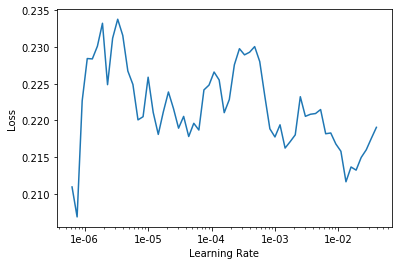

In [0]:
learn.lr_find()
learn.recorder.plot(skip_end=15)

In [0]:
learn.fit(5, 2e-4)

epoch,train_loss,valid_loss,accuracy,time
0,0.236199,0.202805,0.936000,00:01
1,0.239927,0.202551,0.930000,00:01
2,0.229330,0.194538,0.936500,00:01
3,0.225491,0.193114,0.938000,00:01
4,0.209648,0.199555,0.938000,00:01


In [0]:
interp = ClassificationInterpretation.from_learner(learn)

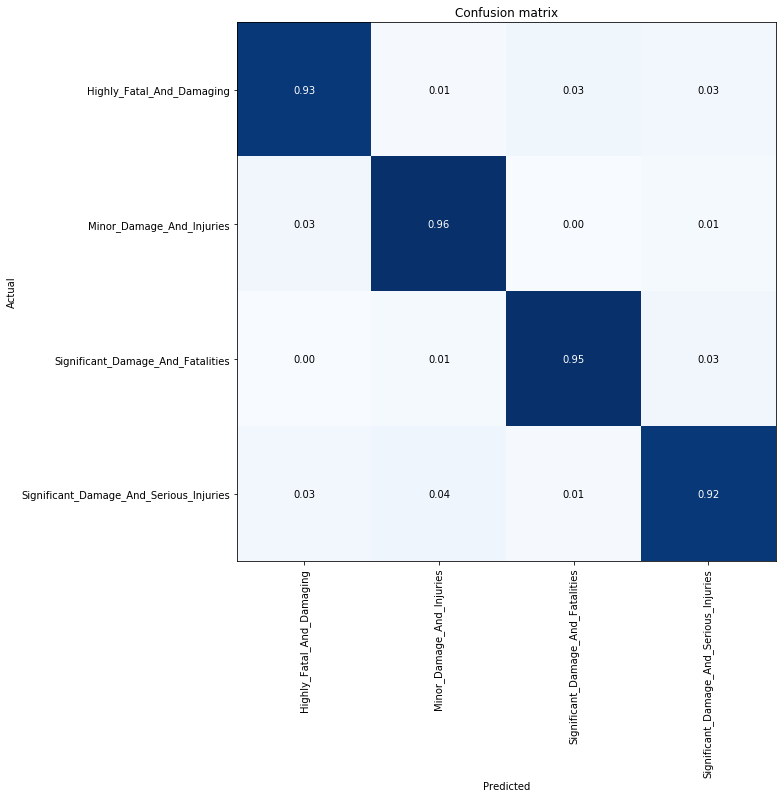

In [0]:
interp.plot_confusion_matrix(9, figsize=(15,11))

In [0]:
learn.save

In [0]:
dd = pd.read_csv(path/"test.csv")

In [0]:
row = dd.iloc[0]

In [0]:
learn.predict(row)[0]

Category Highly_Fatal_And_Damaging

In [0]:
predictions = []
acc_id = []
for i in range(len(dd['Accident_ID'])):
  row = dd.iloc[i]
  pred = learn.predict(row)[0]
  predictions.append(pred)
  acc_id.append(dd['Accident_ID'][i])

In [0]:
pred_series = pd.Series(predictions)
acc_id_series = pd.Series(acc_id)

In [0]:
frame = {'Accident_ID':acc_id_series, 'Severity':pred_series}
d = pd.DataFrame(frame)

In [0]:
d.head()

,Accident_ID,Severity
0,1,Highly_Fatal_And_Damaging
1,10,Significant_Damage_And_Fatalities
2,14,Significant_Damage_And_Serious_Injuries
3,17,Highly_Fatal_And_Damaging
4,21,Highly_Fatal_And_Damaging


In [0]:
d.to_csv('result.csv')